### Demand Paging Algorithms

#### Introduction to the Analysis of Algorithms (3rd ed)
##### Michael Soltys

##### Notebook by Ryan McIntyre

We have defined the ${\it LRU}$, ${\it CLOCK}$, ${\it FIFO}$, ${\it LIFO}$, ${\it LFU}$, and ${\it LFD}$ demand paging algorithms in $\text{paging.py}$.

Now we'll run each of them on some test inputs for comparison. First, we'll try a very basic case: the harddrive has (arbitrarily) 3000 pages, all of which are uniformly likely to be the next demanded page.

In [1]:
from paging import *
import pandas as pd
import numpy as np

clock = CLOCK(2)
lru = LRU(2)
fifo = FIFO(2)
lifo = LIFO(2)
lfu = LFU(2)
lfd = LFD(2)

max_cache_size = 1000
sample_length = 5000
pages_in_harddrive = 3000

data = dict()
for s in range(2,max_cache_size+1):
    clock.reset_cache_size(s)
    lru.reset_cache_size(s)
    fifo.reset_cache_size(s)
    lifo.reset_cache_size(s)
    lfu.reset_cache_size(s)
    lfd.reset_cache_size(s)

    sample = np.random.randint(1,pages_in_harddrive+1,size=sample_length)

    for sa in sample:
        clock.process(sa)
        lru.process(sa)
        fifo.process(sa)
        lifo.process(sa)
        lfu.process(sa)
    lfd.process(list(sample))

    if s%50==0:
        print('size :',s)
    data['clock'+str(s)] = clock.fault_count
    data['lru'+str(s)] = lru.fault_count
    data['fifo'+str(s)] = fifo.fault_count
    data['lifo'+str(s)] = lifo.fault_count
    data['lfu'+str(s)] = lfu.fault_count
    data['lfd'+str(s)] = lfd.fault_count
file = open('data/sample_.txt','w')
file.write(str(data))
file.close()

size : 50
size : 100
size : 150
size : 200
size : 250
size : 300
size : 350
size : 400
size : 450
size : 500
size : 550
size : 600
size : 650
size : 700
size : 750
size : 800
size : 850
size : 900
size : 950
size : 1000


Ignore the "size" prints above; the prior cell runs for several hours, and it served as an easy way to track progress. Next we'll plot the data...

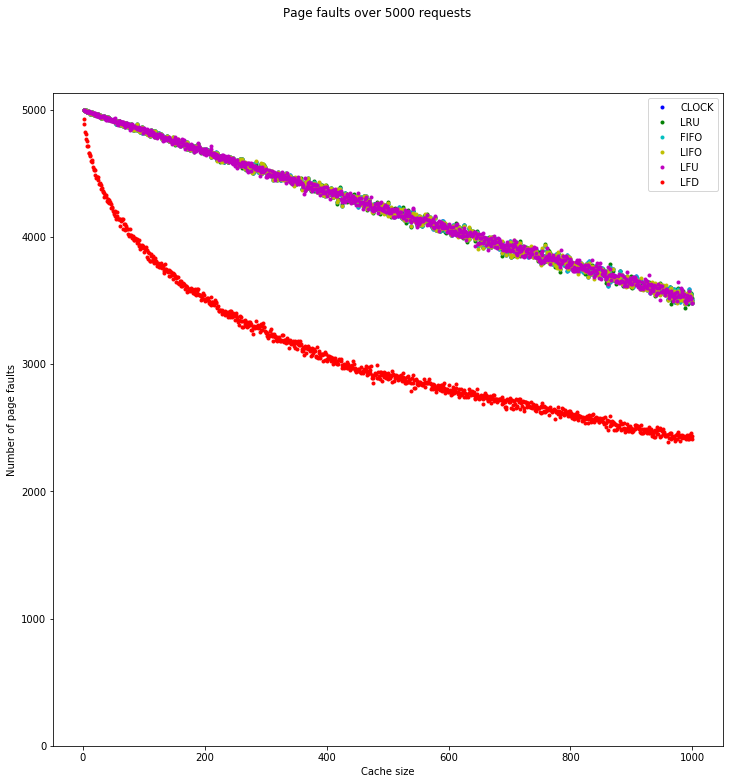

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

file = open('data/sample_.txt','r')
data = eval(file.read())
file.close()

X = [i for i in range(2,max_cache_size+1)]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.plot(X,[data['clock'+str(x)] for x in X],'b.',label='CLOCK')
ax.plot(X,[data['lru'+str(x)] for x in X],'g.',label='LRU')
ax.plot(X,[data['fifo'+str(x)] for x in X],'c.',label='FIFO')
ax.plot(X,[data['lifo'+str(x)] for x in X],'y.',label='LIFO')
ax.plot(X,[data['lfu'+str(x)] for x in X],'m.',label='LFU')
ax.plot(X,[data['lfd'+str(x)] for x in X],'r.',label='LFD')
ax.legend()
ax.set_xlabel('Cache size')
ax.set_ylabel('Number of page faults')
ax.set_ylim((0,ax.get_ylim()[1]))
fig.suptitle('Page faults over '+str(sample_length)+' requests')
#plt.tight_layout()
plt.show()

We see that all of the popular online solutions fall in approximately the same distribution in the uniform case, and moreover that the number of faults seems to be approaching the optimal solution for larger cache sizes (of course they all converge as memory increases; at 5000+ pages in memory we never need to evict!). But this case is far too simple; the entire point, intuitively speaking, behind the more reasonable eviction protocols is an increased likelihood for "higher demand" pages to be in the cache (with varying heuristics of demand). They're useless, then, if demand is uniform. Let's see how they fare with normally distributed inputs (just for the sake of having some elements be more common).

In [3]:
data = dict()
for s in range(2,max_cache_size+1):
    clock.reset_cache_size(s)
    lru.reset_cache_size(s)
    fifo.reset_cache_size(s)
    lifo.reset_cache_size(s)
    lfu.reset_cache_size(s)
    lfd.reset_cache_size(s)

    sample = []
    while len(sample) < sample_length:
        x = int(np.random.normal(pages_in_harddrive/2+.5,pages_in_harddrive/4))
        if x > 0 and x <= pages_in_harddrive:
            sample.append(x)
    sample = np.array(sample)

    for sa in sample:
        clock.process(sa)
        lru.process(sa)
        fifo.process(sa)
        lifo.process(sa)
        lfu.process(sa)
    lfd.process(list(sample))

    if s%50==0:
        print('size :',s)
    data['clock'+str(s)] = clock.fault_count
    data['lru'+str(s)] = lru.fault_count
    data['fifo'+str(s)] = fifo.fault_count
    data['lifo'+str(s)] = lifo.fault_count
    data['lfu'+str(s)] = lfu.fault_count
    data['lfd'+str(s)] = lfd.fault_count
file = open('data/sample_normal.txt','w')
file.write(str(data))
file.close()

size : 50
size : 100
size : 150
size : 200
size : 250
size : 300
size : 350
size : 400
size : 450
size : 500
size : 550
size : 600
size : 650
size : 700
size : 750
size : 800
size : 850
size : 900
size : 950
size : 1000


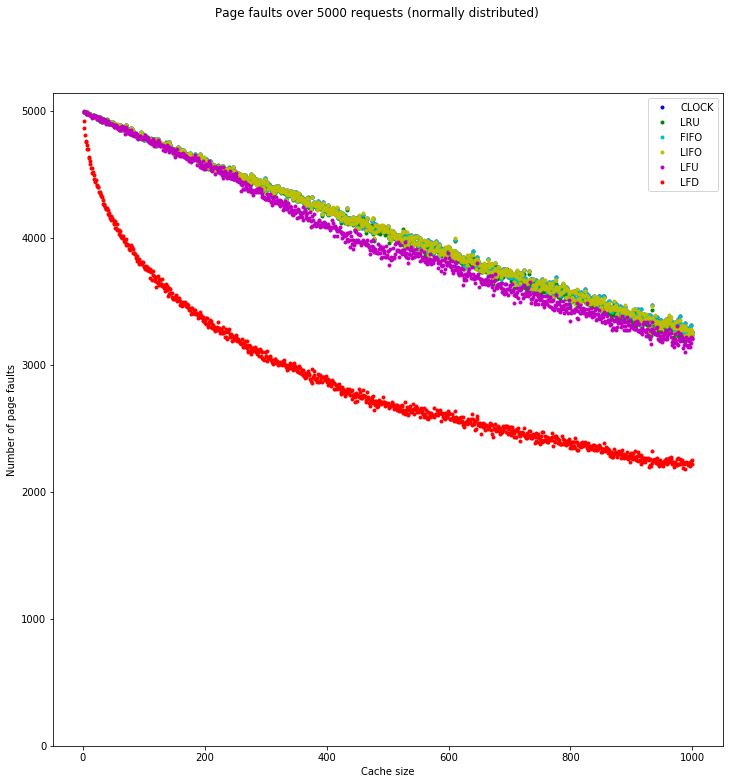

In [8]:
file = open('data/sample_normal.txt','r')
data = eval(file.read())
file.close()

X = [i for i in range(2,max_cache_size+1)]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.plot(X,[data['clock'+str(x)] for x in X],'b.',label='CLOCK')
ax.plot(X,[data['lru'+str(x)] for x in X],'g.',label='LRU')
ax.plot(X,[data['fifo'+str(x)] for x in X],'c.',label='FIFO')
ax.plot(X,[data['lifo'+str(x)] for x in X],'y.',label='LIFO')
ax.plot(X,[data['lfu'+str(x)] for x in X],'m.',label='LFU')
ax.plot(X,[data['lfd'+str(x)] for x in X],'r.',label='LFD')
ax.legend()
ax.set_xlabel('Cache size')
ax.set_ylabel('Number of page faults')
ax.set_ylim((0,ax.get_ylim()[1]))
fig.suptitle('Page faults over '+str(sample_length)+' requests (normally distributed)')
#plt.tight_layout()
plt.show()

We see that the optimal LFD performs slightly better than it did on the uniform distribution. We also see LFU coming out of the gates as the most apt to take advantage of the non-uniform distribution. This model is still overly simple; in reality, the distribution of pages being requested is not always the same (as it is here), and moreover there is no correlation between pages here. The best way to improve this model would be to construct or save more realistic page request sequences. It should also be noted that all of the solutions shown have easily identifiable cases in which they are clearly worse than the others. For example, consider our "best" solution for the normal distribution, LFU. If the cache size is 3, and the request sequence is '1,2,3,1,2,3,1,2,3,4,5,4,5,4,5', LFU will keep '2' and '3' in the cache and switch '4' and '5' back and forth at the end. As such, we could improve on any of the protocols by saving data request sequence data, and then deciding which protocol is "likely to" do well based on the previous requests. The question, then, is: would the cost of doing so be larger than the cost of simply using the "wrong" eviction protocol?